In [102]:
# import libraries 
import numpy as np                   
import seaborn as sns          
import pandas as pd                           
import matplotlib.pyplot as plt

In [103]:
# load the dataset
df = pd.read_csv('./penguins.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [104]:
da = df.select_dtypes(include='object')
# da.info()

for column in da:
    print(column)

species
island
sex


In [105]:
# convert object to category
def convert_cat(input_data):
    selected_columns = input_data.select_dtypes(include='object').columns
    for column in selected_columns:
        input_data[column] = pd.Categorical(input_data[column])
        
    return input_data
        

In [106]:
df_cat = convert_cat(df)
df_cat = df_cat.dropna(subset='sex')
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   species            333 non-null    category
 1   island             333 non-null    category
 2   bill_length_mm     333 non-null    float64 
 3   bill_depth_mm      333 non-null    float64 
 4   flipper_length_mm  333 non-null    float64 
 5   body_mass_g        333 non-null    float64 
 6   sex                333 non-null    category
dtypes: category(3), float64(4)
memory usage: 14.4 KB


In [107]:
df_cat.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [108]:
df_num = df_cat[['bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g']]

df_num.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   bill_length_mm     333 non-null    float64
 1   bill_depth_mm      333 non-null    float64
 2   flipper_length_mm  333 non-null    float64
 3   body_mass_g        333 non-null    float64
dtypes: float64(4)
memory usage: 13.0 KB


In [109]:
# define X and y variables
X = df_num.iloc[:,0:3].values
y = df_num.loc[:,'body_mass_g'].values

print(type(X))
print(type(y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [110]:
print(X)

[[ 39.1  18.7 181. ]
 [ 39.5  17.4 186. ]
 [ 40.3  18.  195. ]
 [ 36.7  19.3 193. ]
 [ 39.3  20.6 190. ]
 [ 38.9  17.8 181. ]
 [ 39.2  19.6 195. ]
 [ 41.1  17.6 182. ]
 [ 38.6  21.2 191. ]
 [ 34.6  21.1 198. ]
 [ 36.6  17.8 185. ]
 [ 38.7  19.  195. ]
 [ 42.5  20.7 197. ]
 [ 34.4  18.4 184. ]
 [ 46.   21.5 194. ]
 [ 37.8  18.3 174. ]
 [ 37.7  18.7 180. ]
 [ 35.9  19.2 189. ]
 [ 38.2  18.1 185. ]
 [ 38.8  17.2 180. ]
 [ 35.3  18.9 187. ]
 [ 40.6  18.6 183. ]
 [ 40.5  17.9 187. ]
 [ 37.9  18.6 172. ]
 [ 40.5  18.9 180. ]
 [ 39.5  16.7 178. ]
 [ 37.2  18.1 178. ]
 [ 39.5  17.8 188. ]
 [ 40.9  18.9 184. ]
 [ 36.4  17.  195. ]
 [ 39.2  21.1 196. ]
 [ 38.8  20.  190. ]
 [ 42.2  18.5 180. ]
 [ 37.6  19.3 181. ]
 [ 39.8  19.1 184. ]
 [ 36.5  18.  182. ]
 [ 40.8  18.4 195. ]
 [ 36.   18.5 186. ]
 [ 44.1  19.7 196. ]
 [ 37.   16.9 185. ]
 [ 39.6  18.8 190. ]
 [ 41.1  19.  182. ]
 [ 36.   17.9 190. ]
 [ 42.3  21.2 191. ]
 [ 39.6  17.7 186. ]
 [ 40.1  18.9 188. ]
 [ 35.   17.9 190. ]
 [ 42.   19.5

In [111]:
print(y)

[3750. 3800. 3250. 3450. 3650. 3625. 4675. 3200. 3800. 4400. 3700. 3450.
 4500. 3325. 4200. 3400. 3600. 3800. 3950. 3800. 3800. 3550. 3200. 3150.
 3950. 3250. 3900. 3300. 3900. 3325. 4150. 3950. 3550. 3300. 4650. 3150.
 3900. 3100. 4400. 3000. 4600. 3425. 3450. 4150. 3500. 4300. 3450. 4050.
 2900. 3700. 3550. 3800. 2850. 3750. 3150. 4400. 3600. 4050. 2850. 3950.
 3350. 4100. 3050. 4450. 3600. 3900. 3550. 4150. 3700. 4250. 3700. 3900.
 3550. 4000. 3200. 4700. 3800. 4200. 3350. 3550. 3800. 3500. 3950. 3600.
 3550. 4300. 3400. 4450. 3300. 4300. 3700. 4350. 2900. 4100. 3725. 4725.
 3075. 4250. 2925. 3550. 3750. 3900. 3175. 4775. 3825. 4600. 3200. 4275.
 3900. 4075. 2900. 3775. 3350. 3325. 3150. 3500. 3450. 3875. 3050. 4000.
 3275. 4300. 3050. 4000. 3325. 3500. 3500. 4475. 3425. 3900. 3175. 3975.
 3400. 4250. 3400. 3475. 3050. 3725. 3000. 3650. 4250. 3475. 3450. 3750.
 3700. 4000. 3500. 3900. 3650. 3525. 3725. 3950. 3250. 3750. 4150. 3700.
 3800. 3775. 3700. 4050. 3575. 4050. 3300. 3700. 34

In [112]:
print(X.shape)

(333, 3)


In [113]:
df_array = df_num.values

print(df_array)

[[  39.1   18.7  181.  3750. ]
 [  39.5   17.4  186.  3800. ]
 [  40.3   18.   195.  3250. ]
 ...
 [  50.4   15.7  222.  5750. ]
 [  45.2   14.8  212.  5200. ]
 [  49.9   16.1  213.  5400. ]]


In [115]:
df_array[:,3]

array([3750., 3800., 3250., 3450., 3650., 3625., 4675., 3200., 3800.,
       4400., 3700., 3450., 4500., 3325., 4200., 3400., 3600., 3800.,
       3950., 3800., 3800., 3550., 3200., 3150., 3950., 3250., 3900.,
       3300., 3900., 3325., 4150., 3950., 3550., 3300., 4650., 3150.,
       3900., 3100., 4400., 3000., 4600., 3425., 3450., 4150., 3500.,
       4300., 3450., 4050., 2900., 3700., 3550., 3800., 2850., 3750.,
       3150., 4400., 3600., 4050., 2850., 3950., 3350., 4100., 3050.,
       4450., 3600., 3900., 3550., 4150., 3700., 4250., 3700., 3900.,
       3550., 4000., 3200., 4700., 3800., 4200., 3350., 3550., 3800.,
       3500., 3950., 3600., 3550., 4300., 3400., 4450., 3300., 4300.,
       3700., 4350., 2900., 4100., 3725., 4725., 3075., 4250., 2925.,
       3550., 3750., 3900., 3175., 4775., 3825., 4600., 3200., 4275.,
       3900., 4075., 2900., 3775., 3350., 3325., 3150., 3500., 3450.,
       3875., 3050., 4000., 3275., 4300., 3050., 4000., 3325., 3500.,
       3500., 4475.,

In [116]:
import numpy as np               
alist = [5, 6, 9, 3]
aray = np.array(alist)
s = 2

for index in range(len(aray)-s):
    tt = aray[index:index+s]
    zz = aray[index+s]
    
    print(tt)
    print(zz)

[5 6]
9
[6 9]
3


In [117]:
np.arange(1,10,1)

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [118]:
for x in range(6):
    print(x)

0
1
2
3
4
5


In [119]:
# slice the numpy arrary
XX = []
yy = []

seq = 3
target_column = 3

for index in range(len(df_array) - seq):
    # print(len(df_array))
    # define x and y values
    x_values = df_array[index:index+seq]
    y_values = df_array[index+seq, target_column]
    
    #append variables
    XX.append(x_values)
    # print(XX)
    yy.append(y_values)
# print(yy)

# print(XX)

In [121]:
XX = np.array(XX)
yy = np.array(yy)


print(XX)
# yy.dropna()

[[[  39.1   18.7  181.  3750. ]
  [  39.5   17.4  186.  3800. ]
  [  40.3   18.   195.  3250. ]]

 [[  39.5   17.4  186.  3800. ]
  [  40.3   18.   195.  3250. ]
  [  36.7   19.3  193.  3450. ]]

 [[  40.3   18.   195.  3250. ]
  [  36.7   19.3  193.  3450. ]
  [  39.3   20.6  190.  3650. ]]

 ...

 [[  48.8   16.2  222.  6000. ]
  [  47.2   13.7  214.  4925. ]
  [  46.8   14.3  215.  4850. ]]

 [[  47.2   13.7  214.  4925. ]
  [  46.8   14.3  215.  4850. ]
  [  50.4   15.7  222.  5750. ]]

 [[  46.8   14.3  215.  4850. ]
  [  50.4   15.7  222.  5750. ]
  [  45.2   14.8  212.  5200. ]]]


In [122]:
print(yy)

[3450. 3650. 3625. 4675. 3200. 3800. 4400. 3700. 3450. 4500. 3325. 4200.
 3400. 3600. 3800. 3950. 3800. 3800. 3550. 3200. 3150. 3950. 3250. 3900.
 3300. 3900. 3325. 4150. 3950. 3550. 3300. 4650. 3150. 3900. 3100. 4400.
 3000. 4600. 3425. 3450. 4150. 3500. 4300. 3450. 4050. 2900. 3700. 3550.
 3800. 2850. 3750. 3150. 4400. 3600. 4050. 2850. 3950. 3350. 4100. 3050.
 4450. 3600. 3900. 3550. 4150. 3700. 4250. 3700. 3900. 3550. 4000. 3200.
 4700. 3800. 4200. 3350. 3550. 3800. 3500. 3950. 3600. 3550. 4300. 3400.
 4450. 3300. 4300. 3700. 4350. 2900. 4100. 3725. 4725. 3075. 4250. 2925.
 3550. 3750. 3900. 3175. 4775. 3825. 4600. 3200. 4275. 3900. 4075. 2900.
 3775. 3350. 3325. 3150. 3500. 3450. 3875. 3050. 4000. 3275. 4300. 3050.
 4000. 3325. 3500. 3500. 4475. 3425. 3900. 3175. 3975. 3400. 4250. 3400.
 3475. 3050. 3725. 3000. 3650. 4250. 3475. 3450. 3750. 3700. 4000. 3500.
 3900. 3650. 3525. 3725. 3950. 3250. 3750. 4150. 3700. 3800. 3775. 3700.
 4050. 3575. 4050. 3300. 3700. 3450. 4400. 3600. 34

In [123]:
yy

array([3450., 3650., 3625., 4675., 3200., 3800., 4400., 3700., 3450.,
       4500., 3325., 4200., 3400., 3600., 3800., 3950., 3800., 3800.,
       3550., 3200., 3150., 3950., 3250., 3900., 3300., 3900., 3325.,
       4150., 3950., 3550., 3300., 4650., 3150., 3900., 3100., 4400.,
       3000., 4600., 3425., 3450., 4150., 3500., 4300., 3450., 4050.,
       2900., 3700., 3550., 3800., 2850., 3750., 3150., 4400., 3600.,
       4050., 2850., 3950., 3350., 4100., 3050., 4450., 3600., 3900.,
       3550., 4150., 3700., 4250., 3700., 3900., 3550., 4000., 3200.,
       4700., 3800., 4200., 3350., 3550., 3800., 3500., 3950., 3600.,
       3550., 4300., 3400., 4450., 3300., 4300., 3700., 4350., 2900.,
       4100., 3725., 4725., 3075., 4250., 2925., 3550., 3750., 3900.,
       3175., 4775., 3825., 4600., 3200., 4275., 3900., 4075., 2900.,
       3775., 3350., 3325., 3150., 3500., 3450., 3875., 3050., 4000.,
       3275., 4300., 3050., 4000., 3325., 3500., 3500., 4475., 3425.,
       3900., 3175.,

In [ ]:
# train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [162]:
list1 = [1,2,4]
list2 = [1,3,4]
empty_list = list1 + list2

sortlist = sorted(empty_list)
sortlist
# veg = empty_list.append(list1)
# print(veg)

[1, 1, 2, 3, 4, 4]

In [165]:
x1 = np.array(list1)
x2 = np.array(list2)

combx = x1 + x2
print(combx)

[2 5 8]


In [169]:
def concat_list(inlist, inlist1):
    comb_list = sorted(inlist + inlist1)
    return comb_list

final_list = concat_list(list1,list2)
print(final_list)

[1, 1, 2, 3, 4, 4]


If a = [1, 2, 2, 2, 3] and b = [2], the result should be [1, 3].

In [176]:
a = [1, 2, 2, 2, 3] 
b = [2]

a[1]

2

In [181]:
def solution(v1,v2):
    result=[]
    for i in v1:
        if i not in v2:
            result.append(i)

    return result
    
a = [1, 2, 2, 2, 3] 
b = [2]

newf = solution(a,b) 
newf  

[1, 3]

In [199]:
# use list comprehension
rez = [x for x in a if x not in b]
rez

[1, 3]

In [192]:
alist2 = (np.arange(1,10))
klist = alist2.tolist()
# print(type(klist))
klist

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [196]:
aa = 5
if aa not in klist:
    print('aa not in list')
else:
    print(f'selection an number in the list {klist}')
    

selection an number in the list [1, 2, 3, 4, 5, 6, 7, 8, 9]


In [200]:
import keyword
print(keyword.kwlist)

['False', 'None', 'True', 'and', 'as', 'assert', 'async', 'await', 'break', 'class', 'continue', 'def', 'del', 'elif', 'else', 'except', 'finally', 'for', 'from', 'global', 'if', 'import', 'in', 'is', 'lambda', 'nonlocal', 'not', 'or', 'pass', 'raise', 'return', 'try', 'while', 'with', 'yield']


In [203]:
klist

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [204]:
klist
de = 12

if de in klist:
    print('found the file')
else:
    print('not found')

not found


In [206]:
dx = 5
fx = [x for x in klist if x > dx]
fx

[6, 7, 8, 9]

In [209]:
def solution(text,ending):
    result = []
    for x in text:
        if x in ending:
            result.append(x)    
    return result

str_value = solution('abc', 'bc')
str_value

['b', 'c']

In [215]:
sum(klist)/len(klist)
# average(klist)
kseries = pd.Series(klist, )
kseries.mean()

np.float64(5.0)

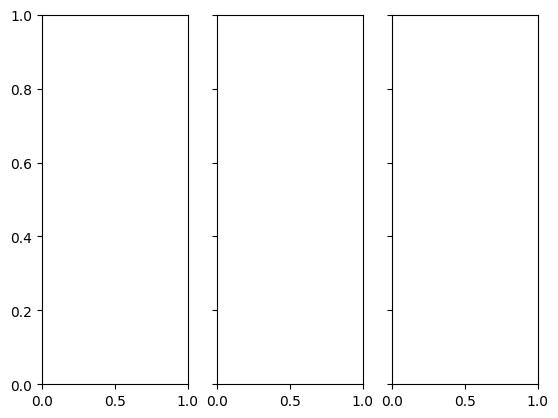

In [ ]:
fig, ax = plt.subplots(1,3,sharey=True)
ax[0].

plt.show()

In [224]:
dd = pd.read_csv('../dev_space/weather_7.csv')
dd.columns

Index(['#', 'Date-Time (CDT)', 'Temperature   (°F)', 'RH   (%)',
       'Dew Point   (°F)', 'Host Connected', 'Stopped', 'End of File'],
      dtype='object')

In [226]:
dd.iloc[:,1:5].head()

,Date-Time (CDT),Temperature (°F),RH (%),Dew Point (°F)
0,05/03/2023 14:51:44,75.78,22.96,35.34
1,05/03/2023 14:56:44,74.03,24.02,35.01
2,05/03/2023 15:01:44,72.86,24.31,34.32
3,05/03/2023 15:06:44,72.23,24.91,34.40
4,05/03/2023 15:11:44,71.80,25.18,34.30


In [229]:
dd['Date-Time (CDT)'] = pd.to_datetime(dd['Date-Time (CDT)'])
dd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39063 entries, 0 to 39062
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   #                   39063 non-null  int64         
 1   Date-Time (CDT)     39063 non-null  datetime64[ns]
 2   Temperature   (°F)  39058 non-null  float64       
 3   RH   (%)            39058 non-null  float64       
 4   Dew Point   (°F)    39058 non-null  float64       
 5   Host Connected      4 non-null      object        
 6   Stopped             1 non-null      object        
 7   End of File         1 non-null      object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(3)
memory usage: 2.4+ MB


In [ ]:
ddx = dd.iloc[:,1:5]
ddxr = ddx.dropna(subset='Date-Time (CDT)')
# ddxr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date-Time (CDT)     0 non-null      datetime64[ns]
 1   Temperature   (°F)  0 non-null      float64       
 2   RH   (%)            0 non-null      float64       
 3   Dew Point   (°F)    0 non-null      float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 0.0 bytes


In [ ]:
import streamlit as st
from PIL import Image
import piexif
import gspread
from oauth2client.service_account import ServiceAccountCredentials
import datetime
import pandas as pd

# --- Google Sheets Auth ---
scope = [
    "https://spreadsheets.google.com/feeds",
    "https://www.googleapis.com/auth/drive"
]
credentials = ServiceAccountCredentials.from_json_keyfile_name("YOUR_CREDENTIALS.json", scope)
gc = gspread.authorize(credentials)
worksheet = gc.open("PoopLocations").sheet1

# --- EXIF GPS Extraction ---
def extract_gps_from_image(image_file):
    try:
        img = Image.open(image_file)
        exif_data = piexif.load(img.info["exif"])
        gps_data = exif_data.get("GPS", {})
        if not gps_data:
            return None, None

        def convert_to_degrees(value):
            d, m, s = value
            return d[0]/d[1] + (m[0]/m[1])/60 + (s[0]/s[1])/3600

        lat = convert_to_degrees(gps_data[2])
        if gps_data[1] == b'S':
            lat = -lat
        lon = convert_to_degrees(gps_data[4])
        if gps_data[3] == b'W':
            lon = -lon

        return lat, lon
    except Exception:
        return None, None

# --- UI ---
st.title("Poop Tracker - Animal Poop Location Mapper")

uploaded_file = st.file_uploader("Upload a photo (with GPS)", type=["jpg", "jpeg"])

if uploaded_file:
    st.image(uploaded_file, caption="Uploaded Image", use_column_width=True)
    lat, lon = extract_gps_from_image(uploaded_file)

    if lat and lon:
        df_existing = pd.DataFrame(worksheet.get_all_records())
        filename = uploaded_file.name
        already_logged = (
            not df_existing.empty and
            ((df_existing['filename'] == filename) & 
             (df_existing['latitude'] == lat) & 
             (df_existing['longitude'] == lon)).any()
        )

        if already_logged:
            st.info("This image has already been logged.")
        else:
            timestamp = datetime.datetime.now().isoformat()
            worksheet.append_row([timestamp, filename, lat, lon])
            st.success(f"Logged location: Latitude = {lat}, Longitude = {lon}")
    else:
        st.warning("No GPS metadata found in this image.")

# --- View & Filter Data ---
st.subheader("Mapped Poop Locations")

data = worksheet.get_all_records()
if data:
    df = pd.DataFrame(data)
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    df['latitude'] = pd.to_numeric(df['latitude'], errors='coerce')
    df['longitude'] = pd.to_numeric(df['longitude'], errors='coerce')

    option = st.selectbox("Select Timeframe", ["All", "Today", "This Week", "This Month"])

    today = datetime.date.today()
    if option == "Today":
        df = df[df['timestamp'].dt.date == today]
    elif option == "This Week":
        df = df[df['timestamp'].dt.isocalendar().week == today.isocalendar().week]
    elif option == "This Month":
        df = df[df['timestamp'].dt.month == today.month]

    st.map(df[['latitude', 'longitude']])
else:
    st.info("No data yet.")
